# Assignment 01 Companion Notebook

This notebook contains some examples that show off various properties of linear regression.  This notebook is mostly focused on linear regression from a top-down perspective.  That is, we are concerned with how does the algorithm behave rather than how it is implemented.  As such we will be using a built-in solver for linear regression and treating it essentially as a black box (you will be opening that black box later in the assignment).

## Numpy Practice

While you will not be doing any programming in this assignment, in order to understand the provided examples it helps to have at least a little bit of knowledge of `numpy`.  Additionally, we will be using `numpy` extensively in this course.  Please use the code block below to play around a bit with `numpy` (assuming you aren't already well-versed in `numpy`'s use').

In order to help you learn how to use `numpy`, you may consider consulting one of these tutorials.

* [Numpy for MATLAB Users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html)
* [Numpy Cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf)

In [0]:
# play around with numpy here
import numpy as np


## A Toy Linear Regression Problem

The notion of a toy problem is very useful for validating that a machine learning algorithm is working as it is intended to.  The basic structure of a toy problem is as follows.

Suppose you are given a learning algorithm designed to estimate some model parameters $\textbf{w}$ from some training data $(\mathbf{X}, \mathbf{y})$.

1.  Generate values for the model parameters $\mathbf{w}$ (e.g., set them to some known values or generate them randomly).  If you were applying your algorithm to real data, you would of course not know these parameters, but instead estimate them from data.  For our toy problem, we'll proceed with values that we generate so we can test our algorithms.

2.  Generate some training input data, $\mathbf{X}$, (random numbers work well for this).  Generate the training output data, $\mathbf{y}$, by applying the model with parameters $\mathbf{w}$.  For example, for a linear regression problem if $\mathbf{w}$ represents the regression coefficients, then we can generate each training label, $y_i$ as $y_i = \mathbf{x_i}^\top \mathbf{w}$.

3.  Run your learning algorithms on the synthesized training data $(\mathbf{X}, \mathbf{y})$ to arrive at estimated values of the model parameters, $\hat{\mathbf{w}}$.

4.  Compare $\mathbf{w}$ and $\hat{\mathbf{w}}$ as a way of understanding whether your learning algorithm is working.

In the next code block, you'll see an example of a toy regression problem where we set $\mathbf{w} = \begin{bmatrix} 1 \\ 2 \end{bmatrix}$, generate some training data, and then recover $\mathbf{w}$ by applying the linear regression algorithm.

In [0]:
import numpy as np

def linear_regression(X, y):
    w, _, _, _ = np.linalg.lstsq(X, y, rcond=None)
    return w

n_points = 50
X = np.random.randn(n_points,2)
w = np.array([1, 2])
y = X.dot(w)
linear_regression(X, y)

array([1., 2.])

*Questions (we will ask some interpretive questions here.  no coding for this part)*
1.  Todo

### Investigating Noise

One thing you might be interested in knowing is how well the algorithm will work when the data doesn't perfectly conform to the hypothesized model (i.e., $y \neq \mathbf{x}^\top \mathbf{w}$).

In the next code block we'll add some noise to the labels and see if the linear regression algorithm can still reconstruct the true parameters $\mathbf{w}$.  In particular, we going to add noise generated from a [Gaussian distribution](https://en.wikipedia.org/wiki/Normal_distribution) with a specified standard deviation.  By modifying `noise_standard_deviation`, you can explore how the magnitude of noise influences the quality of the results (we'll be exploring standard deviation and Gaussians in more detail later in this course).  By modifying `n_points` you can change how many training points are available to the linear regression model for parameter estimation.

In [0]:
n_points = 50
noise_standard_deviation = 2
X = np.random.randn(n_points,2)
w = np.array([1, 2])
y = X.dot(w) + np.random.randn(n_points,) * noise_standard_deviation
linear_regression(X, y)

array([0.70411622, 2.09210011])

*Questions (we will ask some interpretive questions here.  no coding for this part)*
1.  Todo

### Adding a y-intercept (bias) term

The beautiful thing about linear regression is that we can make it work for non-linear functions quite easily.  The easiest way to do this is by augmenting the input data with additional features.  In this way, functions that are non-linear in the original input space become linear in the agumented space.

For instance, the function $\mathbf{w}^\top \mathbf{x} + b$ (where $b$ is a scalar or bias term) is non-linear (We know it looks linear but it is actually affine.  If you are not convinced, you can test it against the properties of a [linear map](https://en.wikipedia.org/wiki/Linear_map)).  On the other hand if we construct the vectors $\mathbf{\tilde{x}} = \begin{bmatrix} \mathbf{x} \\ 1 \end{bmatrix}$ and $\mathbf{\tilde{w}} = \begin{bmatrix} \mathbf{w} \\ b \end{bmatrix}$, then $\mathbf{w}^\top \mathbf{x} + b = \mathbf{\tilde{w}}^\top \mathbf{\tilde{x}}$ where $\mathbf{\tilde{w}}^\top \mathbf{\tilde{x}}$ is now a linear function!

In the code block below, you'll see how this idea can be used to fit a linear regression model to model with a bias term.

In [0]:
b = 3
y = X.dot(w) + b
linear_regression(np.hstack((X, np.ones((X.shape[0],1)))), y)

array([1., 2., 3.])

### Handling Other types of Non-linear Functions

Provided you know the form of the non-linear function you are fitting, you can use linear regression to fit arbitrary non-linear functions.

In the code below we will explore an example where the $y_i = w^\top x_i+x_{i,1}^2$. We'll create modified feature vector $\mathbf{\tilde{x}} = \begin{bmatrix} x \\ x^2 \end{bmatrix}$, and apply linear regression to those vectors.  You'll see that the linear regression with the additional feature will match much better to the training data (have a lower error) than the one where we don't allow for this new feature.

Sum of squares for original model 91.970658151095
Sum of squares for augmented model 5.596290195202654e-29
[0.78094401 1.76850268]


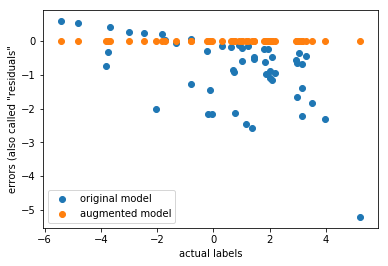

In [0]:
# make this X a scalar for easier interpretation
y = X.dot(w) + np.square(X[:,0])
w_estimate = linear_regression(X, y)
original_model_preds = X.dot(w_estimate)
print("Sum of squares for original model", np.sum(np.square(original_model_preds - y)))

X_augmented = np.column_stack((X, np.square(X[:,0])))
w_estimate_augmented = linear_regression(X_augmented, y)
augmented_model_preds = X_augmented.dot(w_estimate_augmented)
print("Sum of squares for augmented model", np.sum(np.square(augmented_model_preds - y)))
%matplotlib inline
import matplotlib.pyplot as plt
print(w_estimate)
plt.scatter(y, original_model_preds - y)
plt.scatter(y, augmented_model_preds - y)
plt.xlabel('actual labels')
plt.ylabel('errors (also called "residuals"')
plt.legend(['original model', 'augmented model'])
plt.show()

*Questions go here*
1.  TODO

## Predicting Bikeshare Data (Your First Machine Learning Application!)

The University of California maintains a repository of machine learning datasets.  These datasets have been used over the years to benchmark algoirthms in order to faciltate comparisons to previously published work.  In this next section of the notebook you will be exploring the [Bikeshare dataset](https://archive.ics.uci.edu/ml/datasets/bike%20sharing%20dataset).  The Bikeshare dataset contains 



In [0]:
import pandas as pd
bikeshare = pd.read_csv('https://raw.githubusercontent.com/kylecho/nd101_p1_neural_network/master/Bike-Sharing-Dataset/day.csv')
bikeshare

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


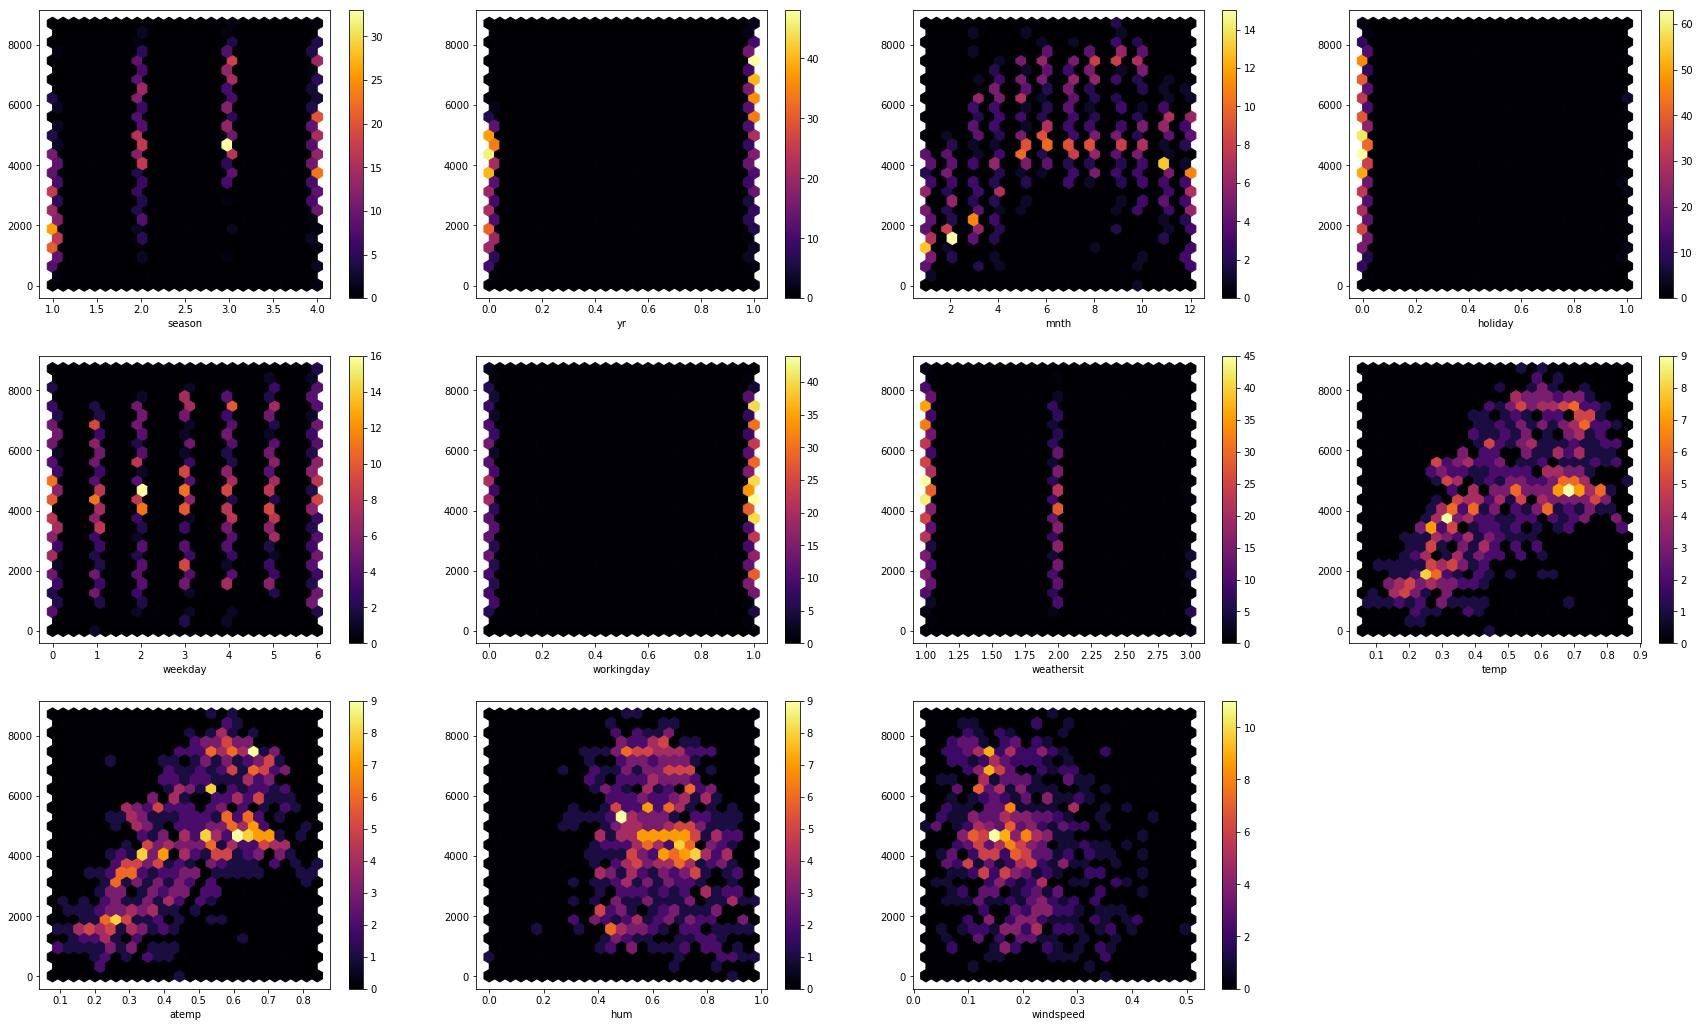

In [0]:
X_bikeshare = bikeshare.drop(columns=['instant', 'dteday', 'cnt', 'registered', 'casual'])
y_bikeshare = bikeshare['cnt']

plt.figure(figsize=(30, 18))
for idx, col in enumerate(X_bikeshare):
    plt.subplot(3, 4, idx+1)
    plt.hexbin(X_bikeshare[col], y_bikeshare, gridsize=25, cmap='inferno')
    plt.colorbar()
    plt.xlabel(col)

plt.subplots_adjust(wspace=.2)
plt.show()

## Your First Machine Learning Application (this is some prelimnary work I did with MNIST, but I don't think it connects well to the previous stuff in the notebook)

[Bikeshare](https://archive.ics.uci.edu/ml/datasets/bike%20sharing%20dataset) is good, but the rising second years might have done this in ModSim (edit: I don't think they did anything with actual bikeshare data.  Instead it was a coding example to help them learn how to program).  Here are [Allen's materials](https://github.com/AllenDowney/ModSimPy/tree/master/notebooks).



In [0]:
mnist = np.loadtxt('/content/sample_data/mnist_train_small.csv',delimiter=',')
y_mnist = mnist[:,0]
X_mnist = mnist[:,1:]

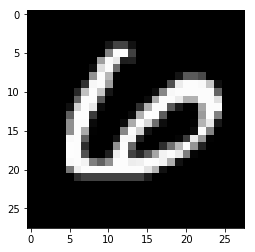

In [0]:
plt.imshow(X_mnist[0].reshape((28,28)))
plt.set_cmap('gray')
plt.show()

In [0]:
w_6 = linear_regression(X_mnist, (y_mnist == 6).astype(float))

In [0]:
np.corrcoef(X_mnist.dot(w_6), (y_mnist == 6).astype(float))

array([[1.        , 0.84687112],
       [0.84687112, 1.        ]])